In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import sigmoid, relu
from keras.losses import mse
from keras.optimizers import SGD
from keras.metrics import mean_squared_error, accuracy

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Using TensorFlow backend.


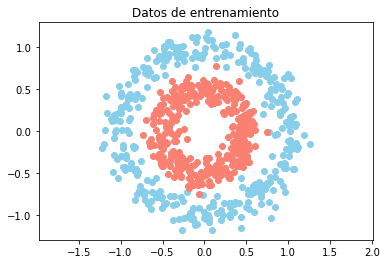

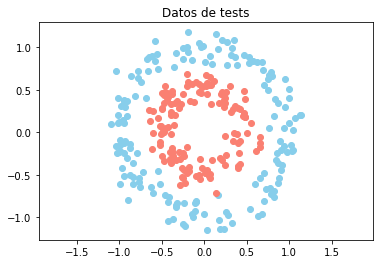

In [3]:
n = 1000

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

plt.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], c="skyblue")
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], c="salmon")
plt.title("Datos de entrenamiento")
plt.axis("equal")
plt.show()

plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], c="skyblue")
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], c="salmon")
plt.title("Datos de tests")
plt.axis("equal")
plt.show()

In [4]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation=relu)) # primera capa oculta 4 neuronas y fa relu
model.add(Dense(8, activation=relu)) # primera capa oculta 8 neuronas y fa relu
model.add(Dense(4, activation=sigmoid)) # primera capa oculta 4 neuronas y fa sigmoid
model.add(Dense(1, activation=sigmoid)) # primera capa oculta 1 neuronas y fa sigmoid

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [9]:

sgd = SGD(learning_rate=0.001)

#adam = Adam(learning_rate=0.006)

model.compile(loss=mse, optimizer=sgd)


In [10]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=10, epochs=200)

Train on 700 samples, validate on 300 samples
Epoch 1/200
700/700 [==============================] - 1s 832us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 2/200
700/700 [==============================] - 0s 636us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 3/200
700/700 [==============================] - 1s 819us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 4/200
700/700 [==============================] - 0s 712us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 5/200
700/700 [==============================] - 0s 605us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 6/200
700/700 [==============================] - 0s 658us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 7/200
700/700 [==============================] - 0s 622us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 8/200
700/700 [==============================] - 0s 697us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 9/200
700/700 [==============================] - 0s 624us/step - loss: 0.2497 - val_loss: 0.2508
Epoch 10/200
700/700 [=====

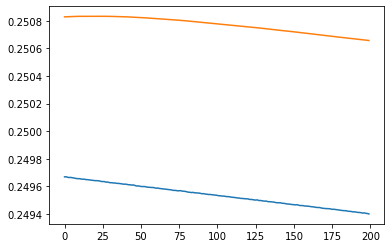

In [11]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])

plt.show()


In [1]:
scores = model.evaluate(X_train, Y_train, verbose=False)

print("Accuary: %.2f%%" % (scores[1]*100))

NameError: name 'model' is not defined